# Worksheet 18

Name: Alexander Miller
UID: U52161825

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

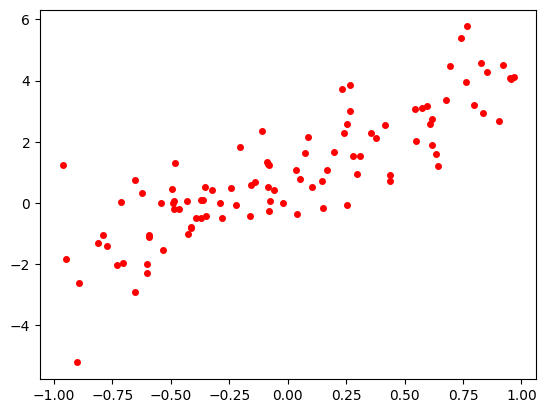

In [2]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

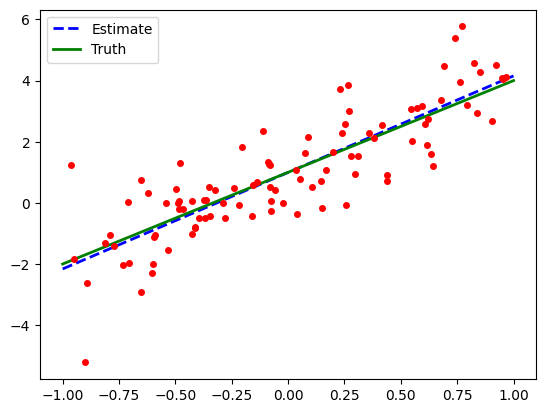

In [3]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimation of the coefficients (beta) from the linear regression model appears to be quite accurate compared to the true parameters used to generate the data:

The estimated intercept (beta_0) is approximately 0.978, which is very close to the true intercept of 1.
The estimated slope (beta_1) is approximately 3.008, again very close to the true slope of 3.
This close match indicates that the linear regression model has done a good job in capturing the underlying relationship between the variables x and y in the generated dataset. The scatter plot and the regression lines visually support this conclusion, as the estimated regression line (in blue dashes) closely follows the true regression line (in green).

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

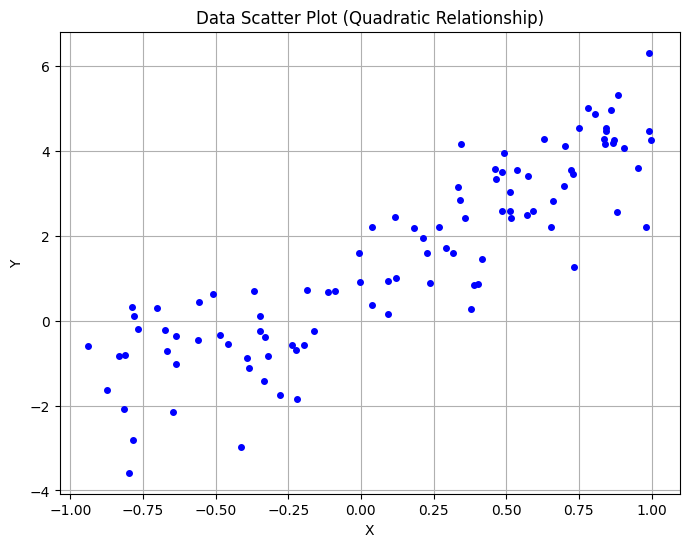

In [4]:
# Generating a new dataset for the specified quadratic relationship
x_new = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y_new = 1 + 3 * x_new + 0.5 * x_new**2 + np.random.randn(SAMPLE_SIZE)

# Plotting the new dataset
plt.figure(figsize=(8, 6))
plt.plot(x_new, y_new, 'bo', markersize=4)
plt.title("Data Scatter Plot (Quadratic Relationship)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


e) Plot the least squares estimate line through the scatter plot.

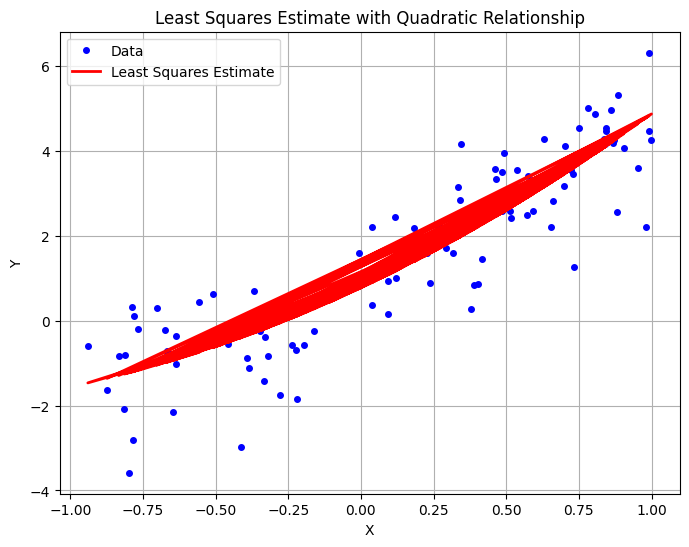

array([0.77174694, 3.21359911, 0.88440645])

In [5]:
# Estimating beta using least squares for the quadratic relationship
X_quad = np.array([np.ones(np.shape(x_new)[0]), x_new, x_new**2]).T
beta_quad_hat = np.linalg.inv(X_quad.T @ X_quad) @ X_quad.T @ y_new

# Plotting the estimated regression line
y_est_quad = beta_quad_hat[0] + beta_quad_hat[1] * x_new + beta_quad_hat[2] * x_new**2

plt.figure(figsize=(8, 6))
plt.plot(x_new, y_new, 'bo', markersize=4, label='Data')
plt.plot(x_new, y_est_quad, 'r-', lw=2, label='Least Squares Estimate')
plt.title("Least Squares Estimate with Quadratic Relationship")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

beta_quad_hat

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

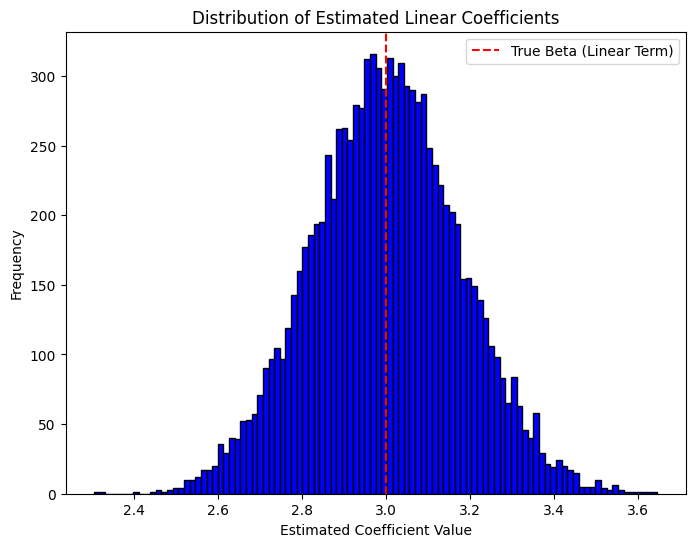

In [6]:
# Repeating the process to analyze the distribution of the estimates

# Number of repetitions
num_repetitions = 10000
betas = []

# True beta values for the quadratic model
true_beta = np.array([1, 3, 0.5])

# Simulation loop
for _ in range(num_repetitions):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = 1 + 3 * x + 0.5 * x**2 + np.random.randn(SAMPLE_SIZE)
    X = np.array([np.ones(np.shape(x)[0]), x, x**2]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    betas.append(beta_hat)

# Plotting the distribution of the estimated linear coefficients
plt.figure(figsize=(8, 6))
plt.hist(np.array(betas)[:, 1], bins=100, color='blue', edgecolor='black')
plt.axvline(x=true_beta[1], c='r', linestyle='dashed', label='True Beta (Linear Term)')
plt.title("Distribution of Estimated Linear Coefficients")
plt.xlabel("Estimated Coefficient Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

From the histogram, we can observe that:

The distribution of the estimated linear coefficients is centered around the true value of 3, indicating that, on average, the estimates are quite accurate.
There is some spread in the estimates, as expected due to the randomness in the data generation process (including the noise term).


g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

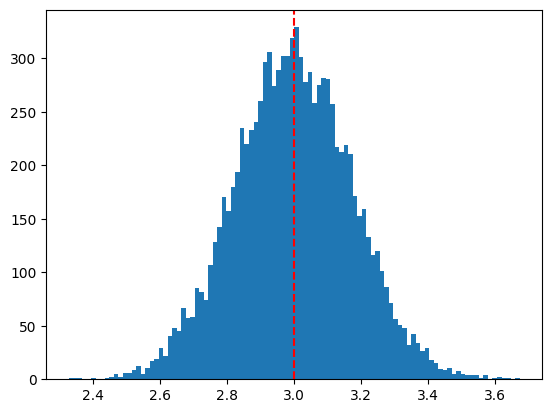

In [7]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([1, 3])  # True beta values for a linear model
SAMPLE_SIZE = 100

for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = 1 + 3 * x + np.random.randn(SAMPLE_SIZE)  # Generating y for a linear model
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    betas.append(beta_hat)

plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.show()
